<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Boston-House-Prices" data-toc-modified-id="Boston-House-Prices-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Boston House Prices</a></span></li><li><span><a href="#Preparation" data-toc-modified-id="Preparation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Preparation</a></span></li><li><span><a href="#Reading-data" data-toc-modified-id="Reading-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Reading data</a></span></li><li><span><a href="#Data-preprocessing" data-toc-modified-id="Data-preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data preprocessing</a></span><ul class="toc-item"><li><span><a href="#Splitting" data-toc-modified-id="Splitting-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Splitting</a></span></li><li><span><a href="#Scaling" data-toc-modified-id="Scaling-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Scaling</a></span></li></ul></li><li><span><a href="#Evaluation-tool" data-toc-modified-id="Evaluation-tool-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Evaluation tool</a></span></li><li><span><a href="#Keras-Linear-Regression" data-toc-modified-id="Keras-Linear-Regression-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Keras Linear Regression</a></span><ul class="toc-item"><li><span><a href="#Fitting" data-toc-modified-id="Fitting-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Fitting</a></span></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Evaluation</a></span></li></ul></li><li><span><a href="#Keras-MLP-(TASK)" data-toc-modified-id="Keras-MLP-(TASK)-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Keras MLP (TASK)</a></span><ul class="toc-item"><li><span><a href="#Fitting" data-toc-modified-id="Fitting-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Fitting</a></span></li><li><span><a href="#Insight-into-network-weights" data-toc-modified-id="Insight-into-network-weights-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Insight into network weights</a></span></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Evaluation</a></span></li></ul></li></ul></div>

# Boston House Prices

In this notebook we're going to build a basic predictive regression model for estimating the house prices in thousands of $ given some housing factors such as crime rate in neighborhood, number of schools % lower status of the population etc.

# Preparation

Import required libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

from keras.layers import Dense, Input
from keras.models import Model
from keras.utils.vis_utils import model_to_dot

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from IPython.display import SVG, display

Using TensorFlow backend.


Set style for plotting

In [2]:
sns.set(style="whitegrid", font_scale=1.3)
matplotlib.rcParams["legend.framealpha"] = 1
matplotlib.rcParams["legend.frameon"] = True

Fix random seed for reproducibility

In [3]:
np.random.seed(42)

# Reading data

Boston dataset is extremely common in machine learning experiments thus it is embedded in sklearn.

In [4]:
boston = load_boston()

Detailed description of dataset and features

In [5]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Create pandas dataframe with objects in rows and features in columns

In [6]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

In [7]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


Note that some of the features are catecorical and some are continious

Let's also take a look into correlation matrix of features

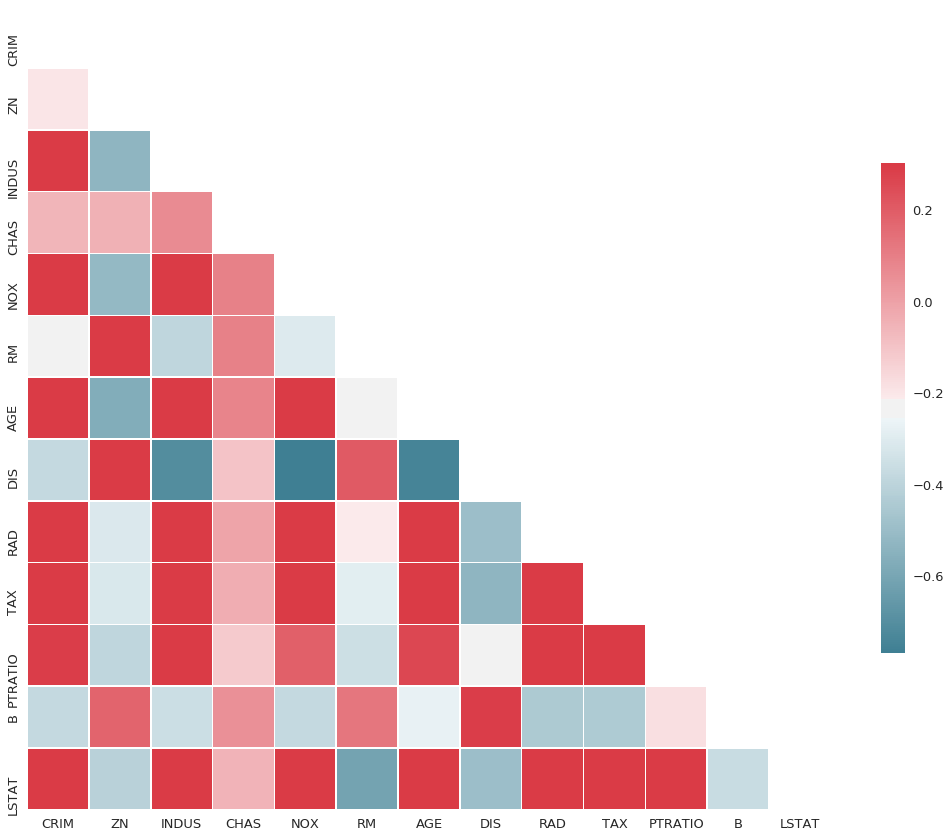

In [9]:
# compute the correlation matrix
corr = X.corr()

# generate a mask for the lower triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax);

# Data preprocessing

## Splitting

Let's split our data to train and test set in fraction of $\frac{4}{1}$

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

There are lots of feature, let's visualize two of them

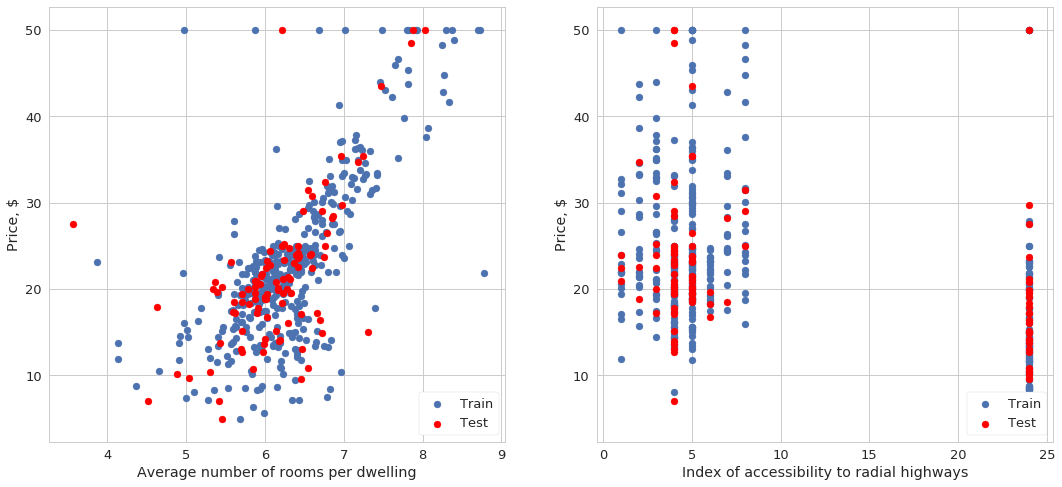

In [11]:
plt.figure(figsize=(18, 8))
plt.subplot(121)
plt.scatter(X_train.RM, y_train, label="Train")
plt.scatter(X_test.RM, y_test, c="r", label="Test")
plt.xlabel("Average number of rooms per dwelling")
plt.ylabel("Price, $")
plt.legend(loc="lower right", frameon=True)
plt.subplot(122)
plt.scatter(X_train.RAD, y_train, label="Train")
plt.scatter(X_test.RAD, y_test, c="r", label="Test")
plt.xlabel("Index of accessibility to radial highways")
plt.ylabel("Price, $")
plt.legend(loc="lower right");

## Scaling

Let's also do normalization to the range of $(0; 1)$ to make our data insensitive to the scale of features

In [12]:
scaler = MinMaxScaler()

Note that we're going to learn normalization constants only on training set. That's done because the assumption is that test set is unreachable during training.

In [13]:
X_train = scaler.fit_transform(X_train)

Transform test set with the same constants

In [14]:
X_test = scaler.transform(X_test)

# Evaluation tool

There is no MAPE implementation in sklearn (because this metric is undefined when real value is zero). Below one can find my own implementation

In [15]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """
    Use of this metric is not recommended because can cause division by zero
    See other regression metrics on sklearn docs:
      http://scikit-learn.org/stable/modules/classes.html#regression-metrics
    Use like any other metric
    >>> y_true = [3, -0.5, 2, 7]; y_pred = [2.5, -0.3, 2, 8]
    >>> mean_absolute_percentage_error(y_true, y_pred)
    Out[]: 24.791666666666668
    """

    return np.mean(np.abs((y_true.ravel() - y_pred.ravel()) / y_true.ravel())) * 100

Let's evaluate our model according to three different metrics:
* MAE (Mean Absolute Error)
* RMSE (Root Mean Squared Error)
* MAPE (Mean Absolute Percentage Error)

In [16]:
metrics = [mean_absolute_error, 
           lambda y_true, y_pred: mean_squared_error(y_true, y_pred) ** 0.5, 
           mean_absolute_percentage_error]
metrics_names = ["MAE", 
                 "RMSE", 
                 "MAPE"]

Also we want to check quality on both train and test sets

In [17]:
samples = [(X_train, y_train), 
           (X_test, y_test)]
models_names = ["Sklearn"]

Let's do it in loop

In [18]:
def evaluate(models, metrics, samples, metrics_names, models_names):
    results = np.zeros((len(samples) * len(models), len(metrics)))
    samples_names = []
    for m in models_names:
        samples_names.extend([m + " Train", m + " Test"])
    for m_num, model in enumerate(models):
        for row, sample in enumerate(samples):
            for col, metric in enumerate(metrics):
                results[row + m_num * 2, col] = metric(sample[1], model.predict(sample[0]))
    results = pd.DataFrame(results, columns=metrics_names, index=samples_names)
    return results

# Keras Linear Regression

Linear Regression model can be seen as a neural network without hidden layer and any activation function

Number of features in Boston dataset is 13. Thus the input layer has 13 units. We want to predict only one value - price of the house. Therefore output layer has only one unit.

In [19]:
inp = Input(shape=(13,))
out = Dense(1)(inp)

Usual Linear Regression is done by means of solving Ordinary Least Square Error problem which means that one should one squared (mse) loss.

Here we also choose the simplest optimizer - usual stohastic gradient descent.

In [20]:
model_keras = Model(inputs=[inp], outputs=[out])
model_keras.compile(loss="mse", optimizer="sgd", metrics=["mae"])

## Fitting

In [21]:
hist = model_keras.fit(X_train, y_train, 
                       validation_data=(X_test, y_test), 
                       epochs=300, verbose=0)

Mean Absolute Error (MAE) evolution during training

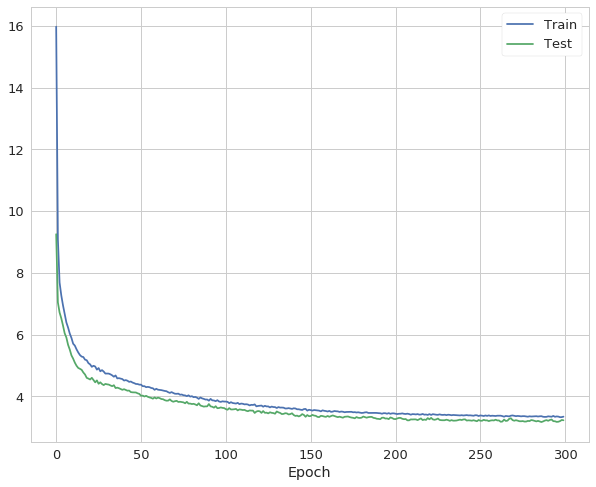

In [22]:
plt.figure(figsize=(10, 8))
plt.plot(hist.history["mean_absolute_error"], label="Train")
plt.plot(hist.history["val_mean_absolute_error"], label="Test")
plt.legend(frameon=True)
plt.xlabel("Epoch");

## Evaluation

In [23]:
models = [model_keras]
models_names = ["Keras"]

In [24]:
evaluate(models, metrics, samples, metrics_names, models_names)

,MAE,RMSE,MAPE
Keras Train,3.349016,4.846047,16.885045
Keras Test,3.229179,5.186921,17.483060


# Keras MLP (TASK)

Number of features in Boston dataset is 13. Thus the input layer has 13 units. We want to predict only one value - price of the house. Therefore output layer has only one unit.

Now let's add one more hidden layer with $20$ unit between input and output and $\text{tanh}$ activation function.

The syntax is the following (Keras API):

$\text{<name> = <Layer>(<args>)(<name of layer to connect to>)}$

In [37]:
inp = Input(shape=(13,))
# add Dense layer called "hidden" with 20 neurons and "relu" activation and connect it to the "inp" layer
x = Dense(100, activation="tanh")(inp)
# x = Dense(100, activation="relu")(x)
out = Dense(1, activation="linear")(x)

MLP

In [38]:
model_mlp = Model(inputs=[inp], outputs=[out])
model_mlp.compile(loss="mse", optimizer="sgd", metrics=["mae"])

Model description

In [39]:
model_mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 13)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               1400      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 1,501
Trainable params: 1,501
Non-trainable params: 0
_________________________________________________________________


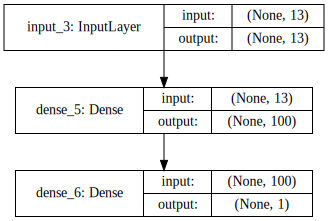

In [40]:
arch_pic = SVG(model_to_dot(model_mlp, show_shapes=True).create(prog='dot', format='svg'))
display(arch_pic)

## Fitting

In [41]:
%%time
hist = model_mlp.fit(X_train, y_train, 
                     validation_data=(X_test, y_test), 
                     epochs=500, verbose=0)

CPU times: user 7.63 s, sys: 1.24 s, total: 8.87 s
Wall time: 7.01 s


MAE evolution during training

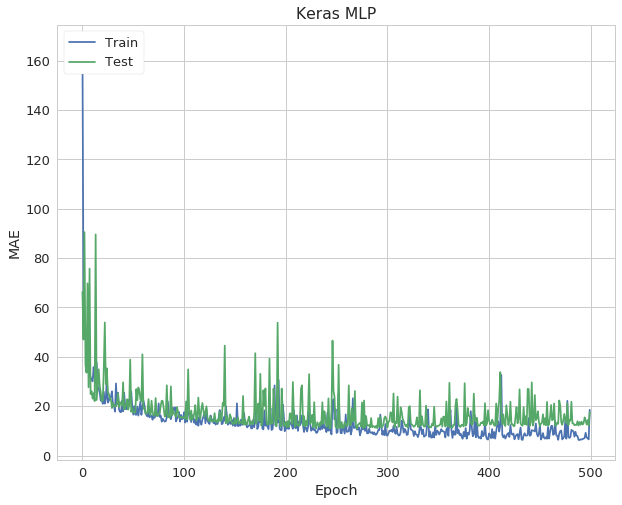

In [42]:
plt.figure(figsize=(10, 8))
plt.plot(hist.history["loss"], label="Train")
plt.plot(hist.history["val_loss"], label="Test")
plt.legend(frameon="True", loc="upper left")
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.title("Keras MLP")
plt.show()

## Insight into network weights

Let's look how weights look like

In [43]:
weigths = model_mlp.get_weights()

We have the following number of parameter matrices

In [44]:
len(weigths)

4

They are:
* $\text{weigths[0]} = \text{W}^{1}$ is a weight matrix between input and hidden layer; should have $(13;20)$ shape because we have dimension of input 13 and hidden dimension 20
* $\text{weigths[1]} = \mathbf{b}^{1}$ is a bias vector for hidden layer; should have $(20,)$ shape because we have 20 as a  dimension of a hidden layer
* $\text{weigths[2]} = \text{W}^{2}$ is a weight matrix between hidden and output layer; should have $(20; 1)$ shape because we have hidden dimension 20 and dimension of output 3
* $\text{weigths[3]} = \mathbf{b}^{2}$ is a bias vector for output layer; should have $(1,)$ shape because we have 3 as an output dimension

In [45]:
print(weigths[0].shape)
print(weigths[1].shape)
print(weigths[2].shape)
print(weigths[3].shape)

(13, 100)
(100,)
(100, 1)
(1,)


Example of weight matrix and bias vector

In [46]:
print("W^2:")
print(weigths[2])
print("\nb^2:")
print(weigths[3])

W^2:
[[ 0.74903476]
 [ 0.15460423]
 [-0.89262253]
 [ 1.51958477]
 [-0.2099653 ]
 [ 0.87062687]
 [ 0.02533095]
 [-8.19783211]
 [ 1.35097349]
 [-1.62943268]
 [ 0.92888337]
 [ 0.20046672]
 [-0.80343705]
 [-0.59751433]
 [ 0.20950493]
 [ 0.82123464]
 [-0.20653777]
 [-0.63226259]
 [-0.1533443 ]
 [-1.24444664]
 [-1.38168573]
 [-0.61036217]
 [ 0.42095879]
 [-1.16755223]
 [-1.66828859]
 [-0.04987315]
 [ 4.40410042]
 [ 1.40104032]
 [ 0.27726772]
 [ 0.82815903]
 [-1.03793478]
 [-0.5557639 ]
 [-2.08221936]
 [ 0.56512016]
 [-1.13525999]
 [ 0.01297933]
 [ 0.36465591]
 [-0.43460846]
 [ 0.08147364]
 [-1.65940642]
 [-1.28593338]
 [ 1.72909129]
 [-1.54319823]
 [-0.4770993 ]
 [-0.2533184 ]
 [-0.96824265]
 [-2.85400844]
 [-0.18228005]
 [-3.06382036]
 [-0.68367219]
 [ 0.02876874]
 [-1.62104535]
 [ 0.40920725]
 [-1.44173789]
 [ 1.3638742 ]
 [ 1.48503935]
 [-0.81441015]
 [-1.36143959]
 [ 0.10263856]
 [-0.42517087]
 [ 0.73100287]
 [ 0.63952667]
 [ 0.88752156]
 [-0.06241708]
 [ 0.08108291]
 [-1.16725433]
 [-1.

## Evaluation

In [47]:
models = [model_keras, model_mlp]
models_names = ["Keras LR", "Keras MLP"]

In [48]:
evaluate(models, metrics, samples, metrics_names, models_names)

,MAE,RMSE,MAPE
Keras LR Train,3.349016,4.846047,16.885045
Keras LR Test,3.229179,5.186921,17.483060
Keras MLP Train,2.500125,3.200754,11.854827
Keras MLP Test,2.916947,4.195401,14.396786
